In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
! pip install python-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns



In [ ]:
! pip install scikit-image
! pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from skimage import io

In [ ]:
img = io.imread("/content/drive/MyDrive/mias 1/pgm_files/mdb001.pgm")
print(img.shape)

(1024, 1024)


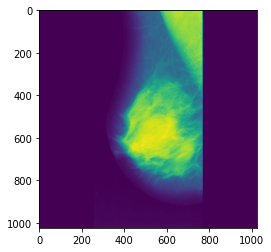

In [ ]:
plt.imshow(img)

In [ ]:
import csv
path = "/content/drive/MyDrive/mias 1/mias_info.csv"


In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head(20)

,ref_num,bg_tissue,ab_class,ab_severity,x_center_ab,y_center_ab,radius_ab
0,mdb001,G,CIRC,B,535,425,197
1,mdb002,G,CIRC,B,522,280,69
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477,133,30
5,mdb005,F,CIRC,B,500,168,26
6,mdb006,F,NORM,NaN,NaN,NaN,NaN
7,mdb007,G,NORM,NaN,NaN,NaN,NaN
8,mdb008,G,NORM,NaN,NaN,NaN,NaN
9,mdb009,F,NORM,NaN,NaN,NaN,NaN


In [ ]:
#dtypes - object means - strings
df.dtypes

ref_num        object
bg_tissue      object
ab_class       object
ab_severity    object
x_center_ab    object
y_center_ab    object
radius_ab      object
dtype: object

In [ ]:
# to replace $ from prcie list
##orders.item_price.str.replace('$','').astype(float).mean() a mathematical operator to check the given column is in int/ float or not.
# to check a particular string in a column 
## orders.item_name.str.contains('chcken').astype(int).head() --- using int so that output comes in 0/1 rather in true/false

In [ ]:
df

,ref_num,bg_tissue,ab_class,ab_severity,x_center_ab,y_center_ab,radius_ab
0,mdb001,G,CIRC,B,535,425,197
1,mdb002,G,CIRC,B,522,280,69
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477,133,30
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(330, 7)

In [ ]:
df.isnull().sum()

ref_num          0
bg_tissue        0
ab_class         0
ab_severity    207
x_center_ab    208
y_center_ab    208
radius_ab      208
dtype: int64

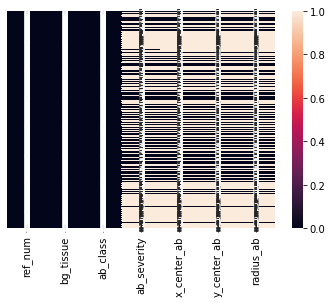

In [ ]:
# yellow indicate the null values
sns.heatmap(df.isnull(), yticklabels=False, annot=True)


In [ ]:
# removing these values
df1 = df.dropna()

In [ ]:
df1.isnull().sum()

ref_num        0
bg_tissue      0
ab_class       0
ab_severity    0
x_center_ab    0
y_center_ab    0
radius_ab      0
dtype: int64

In [ ]:
#some randam values in some rows
df1.tail(20)


,ref_num,bg_tissue,ab_class,ab_severity,x_center_ab,y_center_ab,radius_ab
246,mdb240,D,CALC,B,643,614,23
247,mdb241,D,CALC,M,453,678,38
250,mdb244,D,CIRC,B,466,567,52
251,mdb245,F,CALC,M,*NO,TE 3,*
254,mdb248,F,CALC,B,378,601,10
255,mdb249,D,CALC,M,544,508,48
256,mdb249,D,CALC,M,575,639,64
259,mdb252,F,CALC,B,439,367,23
260,mdb253,D,CALC,M,733,564,28
263,mdb256,F,CALC,M,400,484,37


In [ ]:
df1.shape

(122, 7)

In [ ]:
df1['x_center_ab'] = df1['x_center_ab'].str.replace('\*NO','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1['y_center_ab'] = df1['y_center_ab'].str.replace(' ','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1.tail(20)

,ref_num,bg_tissue,ab_class,ab_severity,x_center_ab,y_center_ab,radius_ab
246,mdb240,D,CALC,B,643,614,23
247,mdb241,D,CALC,M,453,678,38
250,mdb244,D,CIRC,B,466,567,52
251,mdb245,F,CALC,M,,TE3,*
254,mdb248,F,CALC,B,378,601,10
255,mdb249,D,CALC,M,544,508,48
256,mdb249,D,CALC,M,575,639,64
259,mdb252,F,CALC,B,439,367,23
260,mdb253,D,CALC,M,733,564,28
263,mdb256,F,CALC,M,400,484,37


In [ ]:
df1['y_center_ab'] = df1['y_center_ab'].str.replace('TE3','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1['radius_ab'] = df1['radius_ab'].str.replace('\*','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1.tail(20)

,ref_num,bg_tissue,ab_class,ab_severity,x_center_ab,y_center_ab,radius_ab
246,mdb240,D,CALC,B,643,614,23
247,mdb241,D,CALC,M,453,678,38
250,mdb244,D,CIRC,B,466,567,52
251,mdb245,F,CALC,M,,,
254,mdb248,F,CALC,B,378,601,10
255,mdb249,D,CALC,M,544,508,48
256,mdb249,D,CALC,M,575,639,64
259,mdb252,F,CALC,B,439,367,23
260,mdb253,D,CALC,M,733,564,28
263,mdb256,F,CALC,M,400,484,37


In [ ]:
df1.dtypes

ref_num        object
bg_tissue      object
ab_class       object
ab_severity    object
x_center_ab    object
y_center_ab    object
radius_ab      object
dtype: object

In [ ]:
# changing data types
df1[['x_center_ab']] = df1[['x_center_ab']].apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df1.dtypes

ref_num         object
bg_tissue       object
ab_class        object
ab_severity     object
x_center_ab    float64
y_center_ab     object
radius_ab       object
dtype: object

In [ ]:
#filling missing values i.e., Null values with the mean of a column
df1 = df1.fillna(value=df1['x_center_ab'].mean())

In [ ]:
df1.tail(20)

,ref_num,bg_tissue,ab_class,ab_severity,x_center_ab,y_center_ab,radius_ab
246,mdb240,D,CALC,B,643.000000,614,23
247,mdb241,D,CALC,M,453.000000,678,38
250,mdb244,D,CIRC,B,466.000000,567,52
251,mdb245,F,CALC,M,488.605042,,
254,mdb248,F,CALC,B,378.000000,601,10
255,mdb249,D,CALC,M,544.000000,508,48
256,mdb249,D,CALC,M,575.000000,639,64
259,mdb252,F,CALC,B,439.000000,367,23
260,mdb253,D,CALC,M,733.000000,564,28
263,mdb256,F,CALC,M,400.000000,484,37


In [ ]:
df1[['y_center_ab']] = df1[['y_center_ab']].apply(pd.to_numeric)

In [ ]:
df1[['radius_ab']] = df1[['radius_ab']].apply(pd.to_numeric)

In [ ]:
df1 = df1.fillna(value=df1['y_center_ab'].mean())

In [ ]:
df1 = df1.fillna(value=df1['radius_ab'].mean())

In [ ]:
df1['x_center_ab'] = df1['x_center_ab'].astype(int)

In [ ]:
df1['y_center_ab'] = df1['y_center_ab'].astype(int)

In [ ]:
df1['radius_ab'] = df1['radius_ab'].astype(int)

In [ ]:
df1.dtypes

ref_num        object
bg_tissue      object
ab_class       object
ab_severity    object
x_center_ab     int64
y_center_ab     int64
radius_ab       int64
dtype: object

In [ ]:
df1.head(20)

,ref_num,bg_tissue,ab_class,ab_severity,x_center_ab,y_center_ab,radius_ab
0,mdb001,G,CIRC,B,535,425,197
1,mdb002,G,CIRC,B,522,280,69
4,mdb005,F,CIRC,B,477,133,30
5,mdb005,F,CIRC,B,500,168,26
10,mdb010,F,CIRC,B,525,425,33
12,mdb012,F,CIRC,B,471,458,40
13,mdb013,G,MISC,B,667,365,31
15,mdb015,G,CIRC,B,595,864,68
17,mdb017,G,CIRC,B,547,573,48
19,mdb019,G,CIRC,B,653,477,49


In [ ]:
df1.tail(20)

,ref_num,bg_tissue,ab_class,ab_severity,x_center_ab,y_center_ab,radius_ab
246,mdb240,D,CALC,B,643,614,23
247,mdb241,D,CALC,M,453,678,38
250,mdb244,D,CIRC,B,466,567,52
251,mdb245,F,CALC,M,488,520,520
254,mdb248,F,CALC,B,378,601,10
255,mdb249,D,CALC,M,544,508,48
256,mdb249,D,CALC,M,575,639,64
259,mdb252,F,CALC,B,439,367,23
260,mdb253,D,CALC,M,733,564,28
263,mdb256,F,CALC,M,400,484,37


(array([83., 27.,  7.,  2.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([  3. ,  54.7, 106.4, 158.1, 209.8, 261.5, 313.2, 364.9, 416.6,
        468.3, 520. ]),
 <a list of 10 Patch objects>)

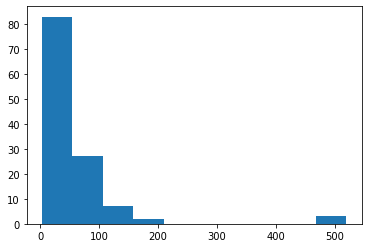

In [ ]:
# to check the sizes by radius
# if we set inplace= true, the dropna method will modify your dataframe directly.
df1.radius_ab.dropna(inplace= True)
plt.hist(df1.radius_ab)

In [ ]:
df1.shape

(122, 7)

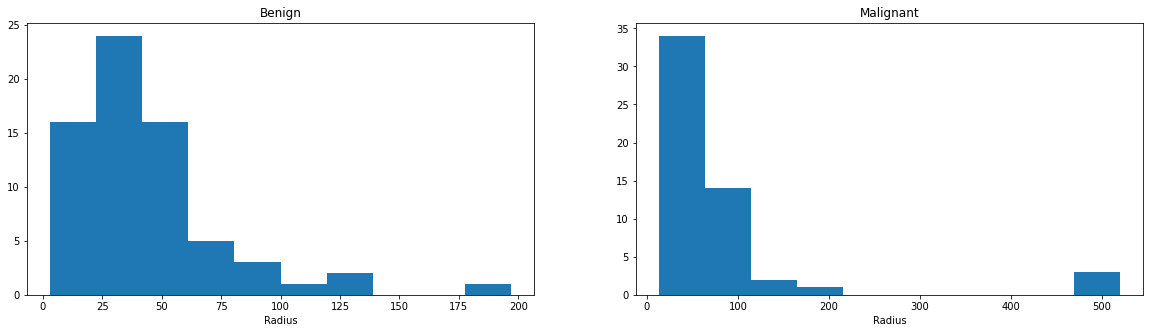

In [ ]:
## Look at radii by severity
sev_radii = df1.loc[:,['radius_ab','ab_severity']]
sev_radii.dropna(axis=0, how='any', inplace=True)
benign = sev_radii[sev_radii.ab_severity == 'B']
malignant = sev_radii[sev_radii.ab_severity == 'M']
f, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].hist(benign.radius_ab)
ax[0].set_xlabel("Radius")
ax[0].set_title("Benign")
ax[1].hist(malignant.radius_ab)
ax[1].set_title("Malignant")
ax[1].set_xlabel("Radius")
plt.show()

In [ ]:
import cv2
import glob

file_list = glob.glob('/content/drive/MyDrive/mias 1/pgm_files/*.*')
print(file_list)

['/content/drive/MyDrive/mias 1/pgm_files/mdb009.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb003.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb012.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb002.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb001.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb015.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb014.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb016.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb013.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb010.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb006.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb004.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb008.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb007.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb017.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb011.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb005.pgm', '/content/drive/MyDrive/mias 1/pgm_files/mdb038.pgm', '/content/drive/MyDrive/mia

/content/drive/MyDrive/mias 1/pgm_files/mdb009.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb003.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb012.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb002.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb001.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb015.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb014.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb016.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb013.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb010.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb006.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb004.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb008.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb007.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb017.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb011.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb005.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb038.pgm
/content/drive/MyDrive/mias 1/pgm_files/mdb034.pgm
/content/drive/MyDrive/mias 1/p

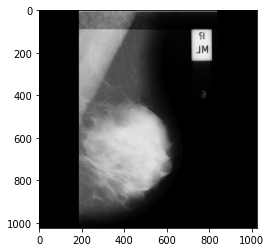

In [ ]:
my_list=[]
path = "/content/drive/MyDrive/mias 1/pgm_files/*.*"
for file in glob.glob(path):
  print(file)

  a = cv2.imread(file)
  my_list.append(a)

from matplotlib import pyplot as plt
plt.imshow(my_list[3])

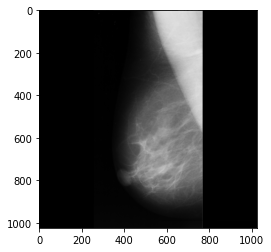

In [ ]:
plt.imshow(my_list[50])

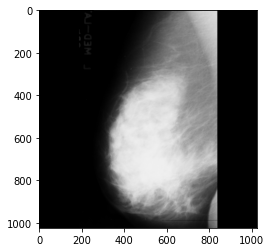

In [ ]:
plt.imshow(my_list[100])

In [ ]:
# percentages by class
df1['ab_class'].value_counts(normalize=True)

CALC    0.245902
CIRC    0.196721
ARCH    0.155738
SPIC    0.155738
MISC    0.122951
ASYM    0.122951
Name: ab_class, dtype: float64

In [ ]:
# percentages by type
df1['ab_severity'].value_counts(normalize=True)


B    0.557377
M    0.442623
Name: ab_severity, dtype: float64

In [ ]:
# info on the size of the abnormalities
import statistics as st
print("Mean abnormality radius:",st.mean(df1.radius_ab))
print("Median abnormality radius:",st.median(df1.radius_ab))
print("Min abnormality radius:",min(df1.radius_ab))
print("Max abnormality radius:",max(df1.radius_ab))

Mean abnormality radius: 60.4344262295082
Median abnormality radius: 42.5
Min abnormality radius: 3
Max abnormality radius: 520


In [ ]:
df1.reset_index(inplace = True)
df1.shape
df1

,index,ref_num,bg_tissue,ab_class,ab_severity,x_center_ab,y_center_ab,radius_ab
0,0,mdb001,G,CIRC,B,535,425,197
1,1,mdb002,G,CIRC,B,522,280,69
2,4,mdb005,F,CIRC,B,477,133,30
3,5,mdb005,F,CIRC,B,500,168,26
4,10,mdb010,F,CIRC,B,525,425,33
...,...,...,...,...,...,...,...,...
117,281,mdb274,F,MISC,M,127,505,123
118,297,mdb290,D,CIRC,B,337,353,45
119,319,mdb312,F,MISC,B,240,263,20
120,321,mdb314,F,MISC,B,518,191,39


In [ ]:
# taking the images filenames in to dictionary
ids = {}
for i in range(len(df1)):
    ids[i] = df1.ref_num[i]




In [ ]:
# Turning our outputs B-M to 0-1
label = []
for i in range(len(df1)):
    if df1.ab_severity[i] == 'B':
        label.append(0)
    else:
        label.append(1)

In [ ]:
label = np.array(label)

In [ ]:
label.shape

(122,)

In [ ]:
# define the every images filepaths in to list
path_img = '/content/drive/MyDrive/mias 1/pgm_files/'
img_name = []

for i in range(len(label)):
        img_name.append(path_img + df1.ref_num[i]+ '.pgm')

In [ ]:
img_name = np.array(img_name)

In [ ]:
print(type(img_name))

<class 'numpy.ndarray'>


In [ ]:
#print(img_name)
print(f'image addres amount {img_name.shape}')

image addres amount (122,)


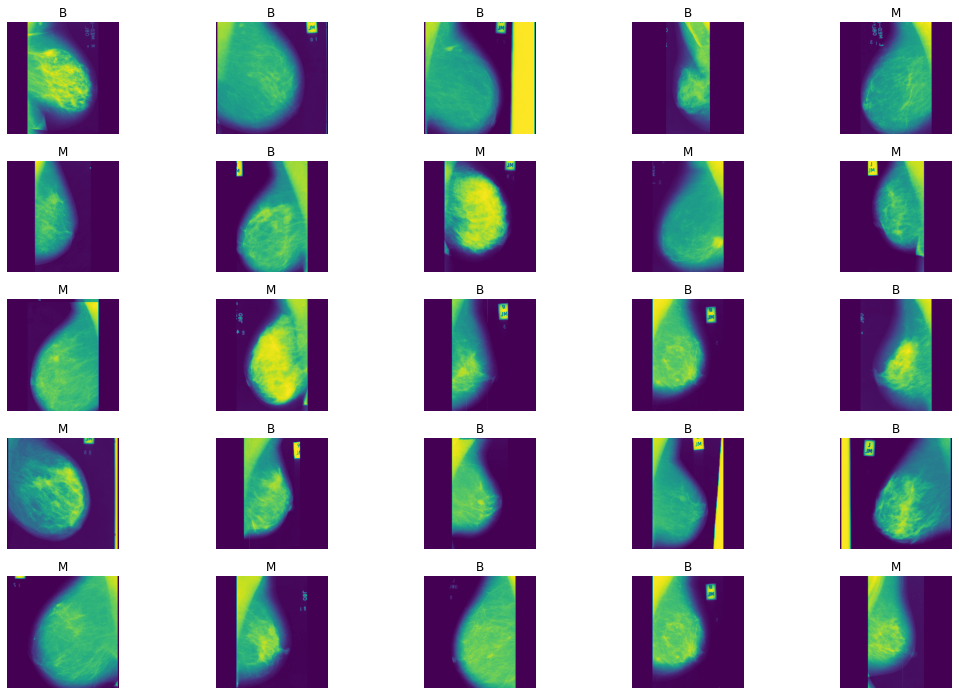

In [ ]:
# view image random images
import random # for visualization
import cv2
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label))
        ax = plt.subplot(5, 5, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256)) 
        if label[rand] == 0:
            plt.title('B')
        else:
            plt.title('M')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()

In [ ]:
img_path = []
last_label = []
for i in range(len(img_name)):
    
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (224,224))
    rows, cols= img.shape
    for angle in range(180):  ##360
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (224, 224))
            img_path.append(img_rotated)
            if label[i] == 1:
                last_label.append(1)
            else:
                last_label.append(0)

In [ ]:
last_label = np.array(last_label) #y
img_path = np.array(img_path) #x

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# split train and test set
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.2)

In [ ]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)
#len(X_train)-- 80% len(X_test)----20%
# data  augmentation should be done only on training data set not on testing dataset/ validation
##Image_gernerator
#"from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
#from PIL import Image
#import io
#import cv2
#datagen = ImageDataGenerator(
#    rotation_range=40,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    rescale= 1./255,
 #   shear_range=0.2,
 #   zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='reflect')

#img_path2= []
#image_directory = '/content/drive/MyDrive/mias 1/pgm_files'
#size = 256

#my_images = os.listdir(image_directory)
#for i, image_name in enumerate(my_images):
#  if (image_name.split('.')[1]=='pgm'):
#    image = cv2.imread(image_directory + image_name)
#    image = Image.fromarray(image,'RGB')
#    image = image.resize((size,size)) 
#    img_path2.append(np.array(image))

#x = np.array(img_path2)

#i = 0
#for batch in datagen.flow(x, batch_size=16,
 #                         save_to_dir ='augmented',
#                          save_prefix ='aug',
  #                        save_format= 'pgm'):
 # i+= 1
#  if i > 20:
#    break"

  
            

    

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(17568, 4392, 17568, 4392)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
x_train.shape


(17568, 224, 224)

In [ ]:
x_test.shape

(4392, 224, 224)

In [ ]:
(a,b,c)=x_train.shape # (35k, 224, 224) for angle in 360 , 17k for angle in 180
x_train = np.reshape(x_train, (a, b, c, 1)) # 1 for gray scale
(a, b, c)=x_test.shape
x_test = np.reshape(x_test, (a, b, c, 1))

Experimenting with the parameters 
* increasing the dropout from .25 to .3
* adding another Maxpool layer after 1 conv2D layer
* increasing filters to 64 from previous 32

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 1)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))

    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        3

In [ ]:
# = EarlyStopping(monitor='val_loss', mode='min', patience=0,restore_best_weights=True, verbose=1)

#check_point_filepath = './'

#model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_loss', verbose=1, save_best_only=True,
    #                                save_weights_only=False, mode='auto', save_freq='epoch')

validation split 0.2 and batch size 32 but epochs changed from 20 to 25

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=25,
                 batch_size=32)
              
#callbacks=[early_stop, model_check_point]

Epoch 1/25
440/440 [==============================] - 49s 78ms/step - loss: 0.8545 - accuracy: 0.5586 - val_loss: 0.6557 - val_accuracy: 0.6121
Epoch 2/25
440/440 [==============================] - 33s 75ms/step - loss: 0.6420 - accuracy: 0.6246 - val_loss: 0.6112 - val_accuracy: 0.6651
Epoch 3/25
440/440 [==============================] - 33s 75ms/step - loss: 0.5916 - accuracy: 0.6764 - val_loss: 0.5917 - val_accuracy: 0.6904
Epoch 4/25
440/440 [==============================] - 35s 80ms/step - loss: 0.5310 - accuracy: 0.7291 - val_loss: 0.4999 - val_accuracy: 0.7635
Epoch 5/25
440/440 [==============================] - 33s 75ms/step - loss: 0.4698 - accuracy: 0.7678 - val_loss: 0.4481 - val_accuracy: 0.7920
Epoch 6/25
440/440 [==============================] - 33s 75ms/step - loss: 0.3894 - accuracy: 0.8171 - val_loss: 0.3352 - val_accuracy: 0.8503
Epoch 7/25
440/440 [==============================] - 33s 74ms/step - loss: 0.3202 - accuracy: 0.8596 - val_loss: 0.2752 - val_accuracy:

In [ ]:
loss_value , accuracy = model.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

print(model.predict(x_test))

138/138 [==============================] - 4s 30ms/step - loss: 0.0633 - accuracy: 0.9786
Test_loss_value = 0.0632743313908577
test_accuracy = 0.9785974621772766
[[1.4903748e-01]
 [9.9998391e-01]
 [6.3893558e-06]
 ...
 [1.8178034e-05]
 [1.8218905e-05]
 [5.0735194e-03]]


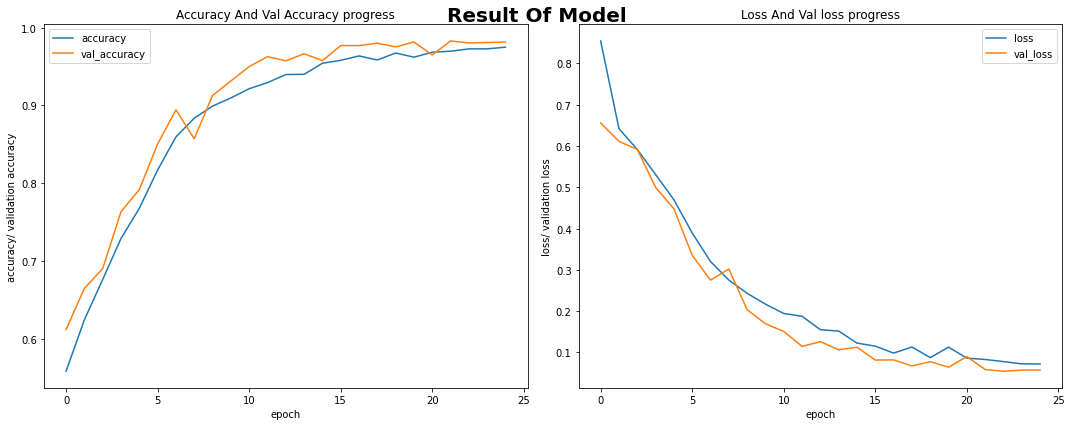

In [ ]:
def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')
    
    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')
    
    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result = Visualize_Result(hist.history['accuracy'],hist.history['val_accuracy'], hist.history['loss'], hist.history['val_loss'])

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred.shape

(4392, 1)

In [ ]:
y_pred

array([[1.4903748e-01],
       [9.9998391e-01],
       [6.3893558e-06],
       ...,
       [1.8178034e-05],
       [1.8218905e-05],
       [5.0735194e-03]], dtype=float32)

Model Evaluation

Accuracy Score


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# accuracy on train data
X_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train,X_train_prediction)
print(training_data_accuracy)



ValueError: ignored

In [ ]:
# accuracy score in test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print(test_data_accuracy)

Confusion Matrix

In [ ]:
from sklern.metrics import confusion_matrix


In [ ]:
cf_matrix = confusion_matrix(Y_test, X_test_prediction)

print(cf_matrix)

In [ ]:
tn, fp, fn , tp = cf_matrix_ravel()

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot= True)

Hyper Parameter Optimization


In [ ]:
! pip install keras.tuner


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 14.4 MB/s 
     |████████████████████████████████| 1.6 MB 51.3 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
print(tf.version)



<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
def build_model(hp):
  model = keras.Sequential([
      keras.layers.Conv2D(
          filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),
          kernel_size=hp.Choice('conv_1_filter', values = [3,5]),
          activation='relu',
          input_shape=(224,224,1)
      ),
      keras.layers.Conv2D(
          filters=hp.Int('conv_2_filter',min_value=32,max_value=64,step=16),
          kernel_size=hp.Choice('conv_2_filter', values=[3,5]),
          activation='relu'
      ),
      keras.layers.Flatten(),
      keras.layers.Dense(                                                                   #keras.layers.dense()
          units=hp.Int('dense_1_units',min_value=32,max_value=128, step=16),
          activation='relu'
      ),
      keras.layers.Dense(10,activation='softmax')
  ])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model  

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=3)

In [ ]:
x_train.shape

(17568, 224, 224, 1)

In [ ]:
x_test.shape

(4392, 224, 224, 1)

In [ ]:
y_train.shape

(17568,)

In [ ]:
tuner_search.search(x_train,y_train,epochs=3,validation_split=0.2 ) ## train_image,train_labels are our x and y

Trial 3 Complete [01h 20m 23s]
val_accuracy: 0.5577689409255981

Best val_accuracy So Far: 0.6314740777015686
Total elapsed time: 01h 36m 04s


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary() # the best model

In [ ]:
model.fit(img_path,last_label,epochs=15,validation_split=0.2,initial_epoch=3)